# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to **build a predictive model and determine the sales of each product at a particular store**.

|Variable|Description|
| ------------- |-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

## 1. Hypothesis Generation

This is a significant step in the process of analyzing data. It involves understanding the problem at hand and making a hypothesis about what could potentially have a good impact on the outcome. 

This is accomplished **before** looking at the data. We will have a list of the different analyses we can potentially perform if the data is available. 

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

----------

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [74]:
nMissingValues = data.isnull().sum().sort_values(ascending=False)
pMissingValues = (nMissingValues/data.isnull().count()*100).sort_values(ascending=False)
missingData = pd.concat([nMissingValues, pMissingValues],axis=1,keys=['Total', 'Percent'])
missingData

,Total,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


**Task:**: Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do the min & max values make sense?

In [75]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [76]:
## Item_Outlet_Sales has a minimum that does not make sense 
# because it's too low.

**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [77]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [78]:
# All data types are float or object.
# Create a list of categorical column names
categorical = data.dtypes[data.dtypes == 'object'].index.tolist()

data[categorical].head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1


In [79]:
# Get number of unique values
data[categorical].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


**Task:** How many products are there, how many stores, item types?


In [80]:
answerIndex = 'unique'

describeCategorical = data[categorical].describe()
# Answers:

print('# of unique products: ',describeCategorical.loc[answerIndex,'Item_Identifier'])
print('# of unique stores: ',describeCategorical.loc[answerIndex,'Outlet_Identifier'])
print('# of item types: ',describeCategorical.loc[answerIndex,'Item_Type'])

# of unique products:  1559
# of unique stores:  10
# of item types:  16


**Task:** Explore the numbers of each categorical variable.

In [81]:
# Remove the categorical variables that are less interesting to look at due to arbitrary values
categorical.remove('Outlet_Identifier')
categorical.remove('Item_Identifier')
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [82]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [83]:
# Look at the unique values and their counts for each categorical variable
for column in categorical[1:]:
    print(column,':', len(data[column].value_counts()),'unique values')
    print(data[column].value_counts(),'\n')

Item_Type : 16 unique values
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Size : 3 unique values
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type : 3 unique values
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type : 4 unique values
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 



Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

-----------

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy; zero filling, mean, & median values. Maybe mean values per `Item_Type`.

**Stretch:** What happens when we fill our missing values with mean vs. median?

In [84]:
import seaborn as sns
import matplotlib as plt

In [85]:
%matplotlib inline

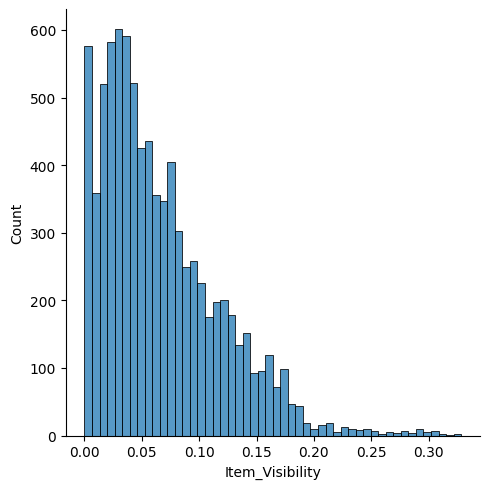

In [86]:
# Identify zero values
# 'Item_Visibility' has a minimum of zero. Plot data.
sns.displot(data=data,x='Item_Visibility')

In [332]:
# Look at the rows with zero item visibility:
# Numerical data
filter=data['Item_Visibility']==0
data[filter].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,436.000000,526.0,526.000000,526.000000,526.000000
mean,12.571766,0.0,138.117157,1997.918251,2222.542928
std,4.626252,0.0,63.372908,8.486795,1741.803049
min,4.590000,0.0,32.890000,1985.000000,33.290000
25%,8.490000,0.0,89.242850,1987.000000,891.339750
50%,12.150000,0.0,130.248100,1999.000000,1774.024100
75%,16.387500,0.0,184.383850,2004.000000,3182.524000
max,21.200000,0.0,264.791000,2009.000000,11445.102000


In [88]:
# Look at the rows with zero item visibility:
# # Categorical variable
for column in categorical[1:]:
    print(column,':', len(data[column][filter].value_counts()),'unique values')
    print('total rows with zero:',data[column][filter].count())
    print(data[column][filter].value_counts(),'\n')

Item_Type : 16 unique values
total rows with zero: 526
Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Breads                   17
Hard Drinks              17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: Item_Type, dtype: int64 

Outlet_Size : 3 unique values
total rows with zero: 382
Medium    178
Small     145
High       59
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type : 3 unique values
total rows with zero: 526
Tier 3    213
Tier 2    169
Tier 1    144
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type : 4 unique values
total rows with zero: 526
Supermarket Type1    342
Supermarket Type2     65
Supermarket Type3     60
Grocery Store         59
Name: Outlet_Type, dtype: i

In [89]:
# I've decided to assume that rows with Item_Visibility = 0 are not missing values. 
# I'm thinking they're likely special order items. Makes sense since mean Item_MRP is high.

In [104]:
# Get names of columsn with missing values
columnsWithMissing = missingData[missingData.Percent > 0].index.tolist()
columnsWithMissing

['Outlet_Size', 'Item_Weight']

In [105]:
# create new variables to indicate missing values in original data
for column in columnsWithMissing:
    data[column+'_missing_indicator'] = 0
    data.loc[data[column].isnull(), column+'_missing_indicator'] = 1
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0


In [106]:
def estimateWeight(data):
    """Obtain an estimated Item_Weight based on the mean item weight for the given Item_Type
    
    Argument:
    dataframe
    """
    data.loc[:,'Item_Weight'] = data['Item_Weight'].mean()
    return data

In [107]:
# Get a sample of 2 rows to test the estimateWeight custom function
data.sort_values('Item_Type').head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
4261,FDY36,12.30,Low Fat,0.009425,Baking Goods,74.838,OUT049,1999,Medium,Tier 1,Supermarket Type1,1537.998,0,0
5387,FDS60,20.85,Low Fat,0.032581,Baking Goods,180.066,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.192,0,0


In [108]:
# test the estimateWeight custom function
estimateWeight(data.sort_values('Item_Type').head(2))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
4261,FDY36,16.575,Low Fat,0.009425,Baking Goods,74.838,OUT049,1999,Medium,Tier 1,Supermarket Type1,1537.998,0,0
5387,FDS60,16.575,Low Fat,0.032581,Baking Goods,180.066,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.192,0,0


In [109]:
# 2022-10-05 22:04
data_filled = data.groupby('Item_Type',group_keys=False).apply(lambda x: estimateWeight(x))
data_filled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,11.847460,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1,0
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,12.987880,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,0
8519,FDS36,12.277108,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,1,0
8520,NCJ29,13.142314,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,0
8521,FDN46,12.987880,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,0


In [110]:
# original
data_filled0 = data.groupby('Item_Type',group_keys=False).apply(lambda x: x.fillna(estimateWeight(x)))
data_filled0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,11.847460,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1,0
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,12.987880,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,0
8519,FDS36,12.277108,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,1,0
8520,NCJ29,13.142314,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,0
8521,FDN46,12.987880,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,0


**Task:** Check if there are no more missing values.

In [111]:
MissingValuesCheck = data_filled.isnull().sum().sort_values(ascending=False)
MissingValuesCheck

Outlet_Size                      2410
Item_Identifier                     0
Item_Weight                         0
Item_Fat_Content                    0
Item_Visibility                     0
Item_Type                           0
Item_MRP                            0
Outlet_Identifier                   0
Outlet_Establishment_Year           0
Outlet_Location_Type                0
Outlet_Type                         0
Item_Outlet_Sales                   0
Outlet_Size_missing_indicator       0
Item_Weight_missing_indicator       0
dtype: int64

In [112]:
#Mean weight of each item type in original data
data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean'))

,mean_weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [113]:
# Check that mean Item_Weight remains 
data_filled.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')) == data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean'))

,mean_weight
Item_Type,
Baking Goods,True
Breads,False
Breakfast,False
Canned,True
Dairy,True
Frozen Foods,True
Fruits and Vegetables,True
Hard Drinks,False
Health and Hygiene,True


In [114]:
pd.concat([data_filled.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')),data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')),abs(data_filled.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')) - data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')))], axis=1, keys=['Filled', 'Original','Difference'])

,Filled,Original,Difference
,mean_weight,mean_weight,mean_weight
Item_Type,,,
Baking Goods,12.277108,12.277108,0.000000e+00
Breads,11.346936,11.346936,1.776357e-15
Breakfast,12.768202,12.768202,8.881784e-15
Canned,12.305705,12.305705,0.000000e+00
Dairy,13.426069,13.426069,0.000000e+00
Frozen Foods,12.867061,12.867061,0.000000e+00
Fruits and Vegetables,13.224769,13.224769,0.000000e+00
Hard Drinks,11.400328,11.400328,3.552714e-15


In [115]:
data_filled.columns
# Bivariate analyses to explore with Outlet_Size

variables = ['Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales']
for variable in variables:
    print(variable,': ', data_filled[variable].dtype)

Outlet_Size :  object
Outlet_Location_Type :  object
Outlet_Type :  object
Item_Outlet_Sales :  float64


In [117]:
# For data with Outlet_Size missing, fill with 'Unknown' for now.
filter2=data['Outlet_Size'].isnull()
data_filled['Outlet_Size'] = data_filled['Outlet_Size'].fillna('Unknown')
data_filled[filter2].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,1,0
8,FDH17,12.867061,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986,1,0
9,FDU28,12.867061,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350,1,0
25,NCD06,13.384736,Low Fat,0.099887,Household,45.9060,OUT017,2007,Unknown,Tier 2,Supermarket Type1,838.9080,1,0
28,FDE51,13.426069,Regular,0.161467,Dairy,45.5086,OUT010,1998,Unknown,Tier 3,Grocery Store,178.4344,1,0


In [118]:
storeRevenue = data_filled.groupby('Outlet_Identifier').agg(outletTotalSales=('Item_Outlet_Sales','sum')).sort_index()
storeRevenue

# Create new df listing each Outlet_Identifier with its total revenue and sutletSize

,outletTotalSales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


In [119]:
def getOutletSize(data):
    """Obtain an Outlet_Size 
    Argument:
    dataframe
    """
    return data[['Outlet_Size']
    # data.loc[0,'Outlet_Size'].values()
data_filled.groupby('Outlet_Identifier').apply(lambda x: getOutletSize(x)).head()

SyntaxError: invalid syntax (164355290.py, line 8)

In [120]:
# Make a dataframe of outlet identifier, outlet type, and outlet size
outletType = data_filled.groupby('Outlet_Identifier').first().sort_values('Outlet_Identifier')[['Outlet_Type','Outlet_Size','Outlet_Location_Type']]

In [121]:
outletDetails = storeRevenue.merge(
    outletType,
    how='left',
    left_index=True,
    right_index=True)
outletDetails

,outletTotalSales,Outlet_Type,Outlet_Size,Outlet_Location_Type
Outlet_Identifier,,,,
OUT010,1.883402e+05,Grocery Store,Unknown,Tier 3
OUT013,2.142664e+06,Supermarket Type1,High,Tier 3
OUT017,2.167465e+06,Supermarket Type1,Unknown,Tier 2
OUT018,1.851823e+06,Supermarket Type2,Medium,Tier 3
OUT019,1.796941e+05,Grocery Store,Small,Tier 1
OUT027,3.453926e+06,Supermarket Type3,Medium,Tier 3
OUT035,2.268123e+06,Supermarket Type1,Small,Tier 2
OUT045,2.036725e+06,Supermarket Type1,Unknown,Tier 2
OUT046,2.118395e+06,Supermarket Type1,Small,Tier 1


<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

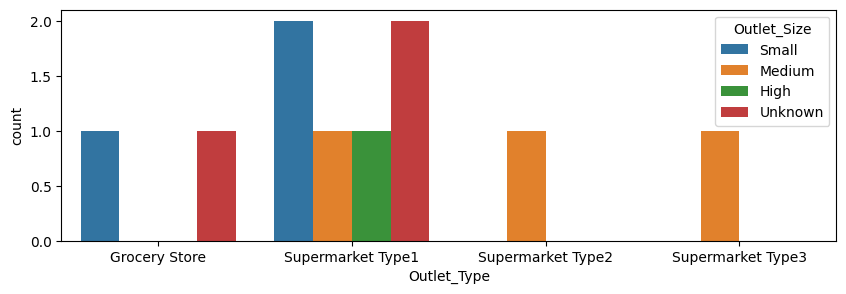

In [124]:
# Make bar graphs 
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=outletDetails,x='Outlet_Type',hue='Outlet_Size',
order=sorted(set(outletDetails['Outlet_Type'])),
hue_order=['Small','Medium','High','Unknown'])

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

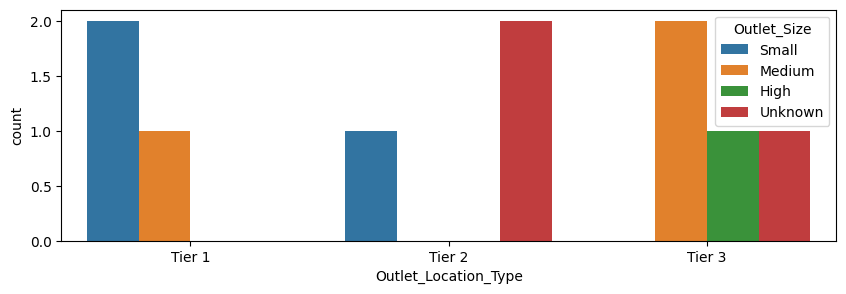

In [125]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=outletDetails,x='Outlet_Location_Type',hue='Outlet_Size',
order=sorted(set(outletDetails['Outlet_Location_Type'])),
hue_order=['Small','Medium','High','Unknown'])

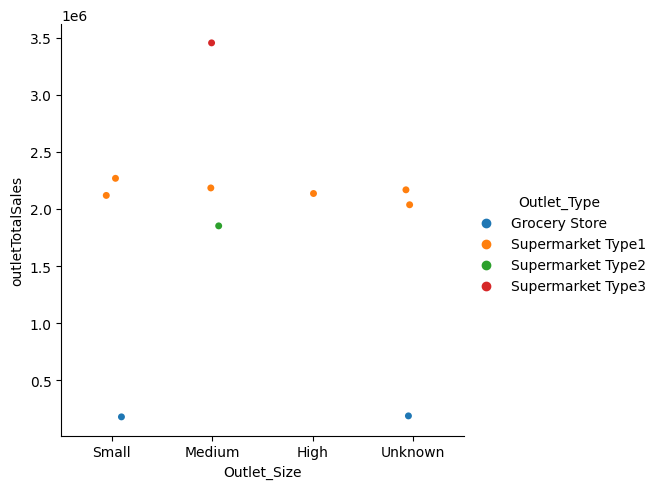

In [126]:
# fig, ax = plt.subplots(figsize=(10,3))
sns.catplot(outletDetails,x='Outlet_Size',y='outletTotalSales',hue='Outlet_Type',
    order=['Small','Medium','High','Unknown'])

In [127]:
data_filled['Outlet_Identifier'].value_counts()
# there are the same number of 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [128]:
# Of the rows missing the 'Outlet_Size', see if there's another row in the dataset that contains the
# same 'Outlet_Identifier' but has 'Outlet_Size'
data_filled[filter2][['Outlet_Identifier','Outlet_Size']].groupby('Outlet_Size').count()
# No luck

,Outlet_Identifier
Outlet_Size,
Unknown,2410


In [129]:
""" I think I'm going to just leave the unknown Outlet_Size as 'Unknown' because there 
doesn't seem to be any strong relationship to Outlet Total Revenue. 
You could argue that stores of unknown Outlet_Size are most likely to have small Outlet_Size, but it's not guaranteed.
"""

" I think I'm going to just leave the unknown Outlet_Size as 'Unknown' because there \ndoesn't seem to be any strong relationship to Outlet Total Revenue. \nYou could argue that stores of unknown Outlet_Size are most likely to have small Outlet_Size, but it's not guaranteed.\n"

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

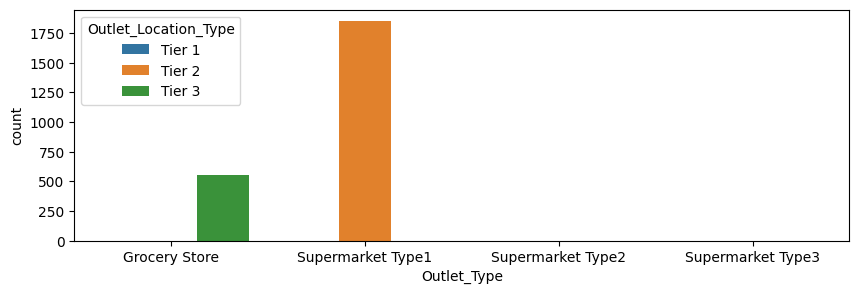

In [130]:
# Look at the rows with NaN for Outlet_Size :
filter2=data['Outlet_Size'].isnull()
data[filter2][variables].describe()
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=data[filter2][variables],x='Outlet_Type',hue='Outlet_Location_Type',
hue_order=sorted(set(data_filled['Outlet_Location_Type'])),
order=sorted(set(data_filled['Outlet_Type'])))

In [131]:
# Filter for stores that don't have Outlet_Size missing
filter3 = data['Outlet_Size'].notnull()
data[filter3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 4. Feature Engineering

1. Resolving the issues in the data to make it ready for the analysis.
2. Create some new variables using the existing ones.





### Create a broad category of Type of Item

`Item_Type` variable has many categories which might prove to be very useful in analysis. Look at the `Item_Identifier`, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. 

**Task:** Use the Item_Identifier variable to create a new column

In [132]:
data_filled['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [133]:
import re

In [134]:
# Find the regular expression that grabs first 2 letters for each Item_Identifier
regex = r'\D\D'
itemCategoryDict = {
    'FD': 'Food','DR': 'Drinks',
    'NC': 'Non-Consumables'
}

In [135]:
# Add a new column for Item Category based on Item_Identifier
data_filled['Item_Category'] = data_filled.Item_Identifier.apply(lambda x: re.match(regex,x).group()).replace(itemCategoryDict)
data_filled.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,Item_Category
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0,Food
1,DRC01,11.847460,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0,Drinks
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0,Food
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,1,0,Food
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,Non-Consumables


### Determine the years of operation of a store

**Task:** Make a new column depicting the years of operation of a store (i.e. how long the store exists). 

In [136]:
from datetime import datetime

# Create a datetime object for current moment
datetime.now().year

2022

In [137]:
data_filled['storeAge'] = datetime.now().year - data_filled['Outlet_Establishment_Year']

In [138]:
data_filled.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,Item_Category,storeAge
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,0,0,Food,23


### Modify categories of Item_Fat_Content

**Task:** There are difference in representation in categories of Item_Fat_Content variable. This should be corrected.

In [139]:
data_filled['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [140]:
# Check what items have 'Item_Fat_Content' of 'LF':
data_filled[data_filled['Item_Fat_Content']=='LF']
# Infer that LF means low fat.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,Item_Category,storeAge
45,FDM39,13.426069,LF,0.089499,Dairy,178.1002,OUT010,1998,Unknown,Tier 3,Grocery Store,358.2004,1,0,Food,24
65,FDC46,12.987880,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Unknown,Tier 3,Grocery Store,184.4266,1,0,Food,24
121,DRJ13,11.847460,LF,0.063018,Soft Drinks,159.0578,OUT045,2002,Unknown,Tier 2,Supermarket Type1,2085.9514,1,0,Drinks,20
175,FDR47,11.346936,LF,0.000000,Breads,196.5794,OUT010,1998,Unknown,Tier 3,Grocery Store,585.2382,1,0,Food,24
207,DRF36,11.847460,LF,0.023625,Soft Drinks,189.3846,OUT045,2002,Unknown,Tier 2,Supermarket Type1,3630.6074,1,0,Drinks,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,FDA32,13.224769,LF,0.052691,Fruits and Vegetables,216.3192,OUT019,1985,Small,Tier 1,Grocery Store,215.7192,0,1,Food,37
8379,FDV39,12.817344,LF,0.007280,Meat,199.3426,OUT046,1997,Small,Tier 1,Supermarket Type1,2372.9112,0,0,Food,25
8391,FDV15,12.817344,LF,0.146172,Meat,103.3648,OUT046,1997,Small,Tier 1,Supermarket Type1,3219.8088,0,0,Food,25
8443,FDX15,12.817344,LF,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404,0,0,Food,23


In [141]:
# Create new column with corrected 'Item_Fat_Content'
data_filled['fatContentCorrected'] = data_filled['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'reg': 'Regular',
    'low fat': 'Low Fat'
})

In [142]:
# Check previous step
data_filled['fatContentCorrected'].value_counts()

Low Fat    5517
Regular    3006
Name: fatContentCorrected, dtype: int64

**Task:** There are some non-consumables as well and a fat-content should not be specified for them. Create a separate category for such kind of observations.

In [143]:
data_filled[data_filled['Item_Category']=='Non-Consumables'].fatContentCorrected.replace(to_replace=r'.*Fat',value='Not applicable',regex=True,inplace=True)
data_filled[data_filled['Item_Category']=='Non-Consumables'].head(3)

C:\Users\silvh\AppData\Local\Temp\ipykernel_18428\391737250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[data_filled['Item_Category']=='Non-Consumables'].fatContentCorrected.replace(to_replace=r'.*Fat',value='Not applicable',regex=True,inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,Item_Category,storeAge,fatContentCorrected
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,Non-Consumables,35,Low Fat
16,NCB42,13.142314,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,0,0,Non-Consumables,13,Low Fat
22,NCB30,13.384736,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,0,0,Non-Consumables,18,Low Fat


In [144]:
data_filled.loc[data_filled['Item_Category']=='Non-Consumables','fatContentCorrected'] = 'Not Applicable'
data_filled[data_filled['Item_Category']=='Non-Consumables'].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,Item_Category,storeAge,fatContentCorrected
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,Non-Consumables,35,Not Applicable
16,NCB42,13.142314,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,0,0,Non-Consumables,13,Not Applicable
22,NCB30,13.384736,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,0,0,Non-Consumables,18,Not Applicable


### Numerical and One-Hot Encoding of Categorical variables

Since scikit-learn algorithms accept only numerical variables, we need to **convert all categorical variables into numeric types.** 

- if the variable is Ordinal we can simply map its values into numbers
- if the variable is Nominal (we cannot sort the values) we need to One-Hot Encode them --> create dummy variables

In [164]:
# Convert values of ordinal data to integers
ordinal = ['Outlet_Size','Outlet_Location_Type','Outlet_Type','fatContentCorrected']
ordinal_integer=[]
for column in ordinal:
    if column =='Outlet_Size':
        values_original = sorted(set(data_filled[column]),reverse=True)
    else:
        values_original = sorted(set(data_filled[column]))
    if column =='Outlet_Location_Type':
        values_integer = [i+1 for i in range(0,len(values_original))]
    elif column == 'fatContentCorrected':
        values_integer = [1,0,2]
    else:
        values_integer = [i+1 for i in range(-1,len(values_original)-1)]
    data_filled[column+'_number'] = data_filled[column].replace(values_original,values_integer)
    ordinal_integer.append(column+'_number')
ordinal_integer = ordinal + ordinal_integer 
data_filled[ordinal_integer].head()

,Outlet_Size,Outlet_Location_Type,Outlet_Type,fatContentCorrected,Outlet_Size_number,Outlet_Location_Type_number,Outlet_Type_number,fatContentCorrected_number
0,Medium,Tier 1,Supermarket Type1,Low Fat,2,1,1,1
1,Medium,Tier 3,Supermarket Type2,Regular,2,3,2,2
2,Medium,Tier 1,Supermarket Type1,Low Fat,2,1,1,1
3,Unknown,Tier 3,Grocery Store,Regular,0,3,0,2
4,High,Tier 3,Supermarket Type1,Not Applicable,3,3,1,0


In [169]:
# Remove alpha characters from Outlet_Identifier and Item_Identifier
data_filled['Outlet_Identifier'] = data_filled['Outlet_Identifier'].str.replace(r'\D*','',regex=True).astype(int)
data_filled['Item_Identifier'] = data_filled['Item_Identifier'].str.replace(r'\D*','',regex=True).astype(int)
data_filled.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,Item_Category,storeAge,fatContentCorrected,Outlet_Size_number,Outlet_Location_Type_number,Outlet_Type_number,fatContentCorrected_number
0,15,13.426069,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,...,3735.138,0,0,Food,23,Low Fat,2,1,1,1


[0.031403441, 0.057792343, 0.098108957]

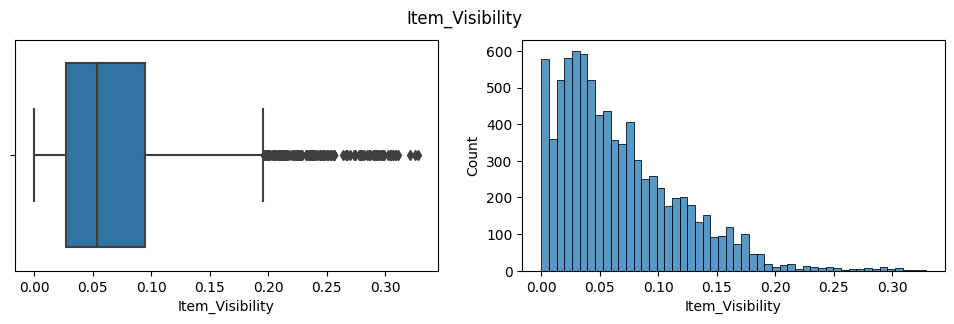

In [483]:
def binQuantile(df,column,nQuantiles=4,separate0=False,splitValues=False):
    """
    Put ratio data into quantile bins, each bin represented by an integer ranging from lowest values 
    to highest values.
    Each bin is inclusive of the higher quantile border value.
    separate0: (Boolean) If true, separate out rows with raw value equal to zero.
    splitValues: (Boolean) If true, split unique values into chunks of equal size. Cannot be combined with `serarate0=True`
    """
    # define the borders between quantiles
    bins = np.linspace(0,1,nQuantiles+1)[1:-1]
    df[column+'_quantiles_'+str(nQuantiles)]=0
    if separate0 == True: # If true, separate out rows with raw value equal to zero
        filter = df[column] != 0 # Assign integer of zero if raw value is 0.0
        quantiles = np.quantile(df[filter][column],bins).tolist()
        df.loc[(df[column]<=quantiles[0]) & (df[column]>0),column+'_quantiles_'+str(nQuantiles)] = 1 # Assign integer value of 1 for first bin of non-zero values
    elif splitValues == True: # Give option to split unique values into chunks of equal size
        quantiles=[]
        values = sorted(df[column].unique())
        for i in range(nQuantiles-1):
            binIndex = round(len(values)/nQuantiles) + round(i*len(values)/nQuantiles)-1
            quantiles.append(values[binIndex])
            df.loc[df[column]<=quantiles[0],column+'_quantiles_'+str(nQuantiles)] = 1 # Assign integer value of 1 for first bin
    else:
        quantiles = np.quantile(df[column],bins).tolist() # Create borders for the bins
        df.loc[df[column]<=quantiles[0],column+'_quantiles_'+str(nQuantiles)] = 1 # Assign integer value of 1 for first bin 
    for bin in range(len(quantiles)-1):
        # print(bin,quantiles[bin],quantiles[bin+1])
        # Filter 
        belongsInBin = (df[column] > quantiles[bin]) & (df[column] <= quantiles[bin+1]) # Assign integers for intermediate bins
        df.loc[belongsInBin,column+'_quantiles_'+str(nQuantiles)] = bin+2
        # print(bin, bin+2)
        # print(quantiles[bin],quantiles[bin+1])
        # print(df[belongsInBin].loc[:,column])
    # df[column+'quantile'+nQuantile]
    df.loc[df[column]>quantiles[-1],column+'_quantiles_'+str(nQuantiles)] = nQuantiles # Assign integers for bin of highest values
    if splitValues == True:
        # print(df.columns.str.contains(column+'_quantiles_'+str(nQuantiles)))
        df.columns = df.columns.str.replace(column+'_quantiles_'+str(nQuantiles),column+'_group_n'+str(nQuantiles))
    # print(df[column+'_quantiles_'+str(nQuantiles)].value_counts().sort_index())
    print('bin borders (each bin inclusive of the higher quantile border value): ',quantiles,'\n')
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,3))
    sns.boxplot(df,x=column,ax=ax[0])
    sns.histplot(df,x=column,ax=ax[1])
    fig.suptitle(column)
    return quantiles

# sns.displot(data_filled,x='Item_Visibility',bins=histbins)

# Classify Item_Visibility into quartiles, but assign value of zero if visbility is equal to zero.
binQuantile(data_filled,'Item_Visibility',4,separate0=True)


unique store ages:  [13, 15, 18, 20, 23, 24, 25, 35, 37]


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Size_missing_indicator',
       'Item_Weight_missing_indicator', 'Item_Category', 'storeAge',
       'fatContentCorrected', 'Outlet_Size_number',
       'Outlet_Location_Type_number', 'Outlet_Type_number',
       'fatContentCorrected_number', 'Item_Visibility_quantiles_4',
       'Item_MRP_quantiles_4', 'storeAge_group_n3'],
      dtype='object')

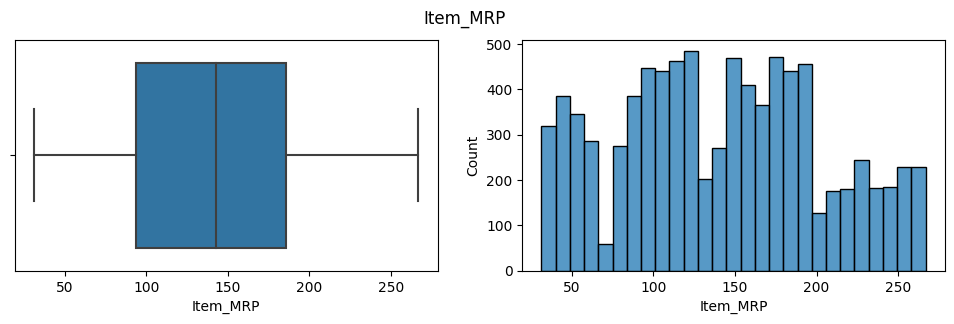

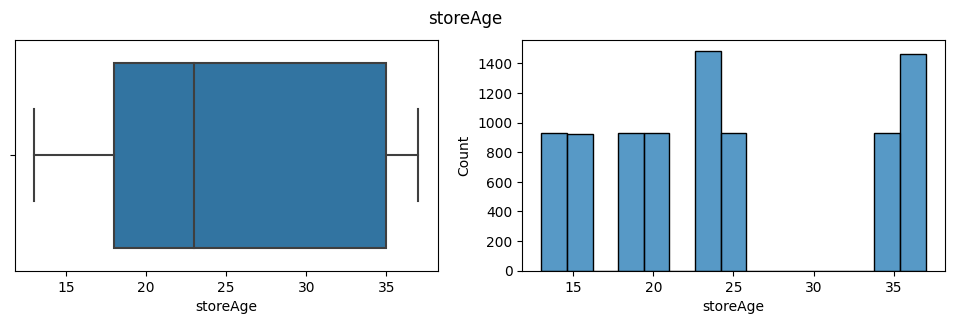

In [490]:
# Classify Item_MRP into quartiles 
binQuantile(data_filled,'Item_MRP')

print('unique store ages: ',sorted(data_filled['storeAge'].unique()))

# Classify 'storeAge' into thirds
binQuantile(data_filled,'storeAge',3,splitValues=True)
data_filled.columns

In [497]:
# Calculate minimum Units_Sold
data_filled['Units_Sold'] = data_filled['Item_Outlet_Sales'] / data_filled['Item_MRP']

In [495]:
data_filled.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Size_missing_indicator',
       'Item_Weight_missing_indicator', 'Item_Category', 'storeAge',
       'fatContentCorrected', 'Outlet_Size_number',
       'Outlet_Location_Type_number', 'Outlet_Type_number',
       'fatContentCorrected_number', 'Item_Visibility_quantiles_4',
       'Item_MRP_quantiles_4', 'storeAge_group_n3', 'Units_Sold'],
      dtype='object')

In [498]:
data_filled.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,storeAge,fatContentCorrected,Outlet_Size_number,Outlet_Location_Type_number,Outlet_Type_number,fatContentCorrected_number,Item_Visibility_quantiles_4,Item_MRP_quantiles_4,storeAge_group_n3,Units_Sold
0,15,13.426069,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,...,23,Low Fat,2,1,1,1,1,4,2,14.951963
1,1,11.847460,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,...,13,Regular,2,3,2,2,1,1,1,9.186454
2,15,12.817344,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,...,23,Low Fat,2,1,1,1,1,2,2,14.809346
3,7,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,Unknown,Tier 3,...,24,Regular,0,3,0,2,0,3,2,4.021967
4,19,13.384736,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,...,35,Not Applicable,3,3,1,0,0,1,3,18.467868


In [170]:
# get list of categorical columns
categorical = data_filled.dtypes[data_filled.dtypes == 'object'].index.tolist()
categorical
# Only Item_Category has yet to be convertd to a number; this should be made into dummy variables

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Category',
 'fatContentCorrected']

In [501]:
columns_prepared = data_filled.dtypes[data_filled.dtypes != 'object'].index.tolist()
columns_prepared

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Outlet_Size_missing_indicator',
 'Item_Weight_missing_indicator',
 'storeAge',
 'Outlet_Size_number',
 'Outlet_Location_Type_number',
 'Outlet_Type_number',
 'fatContentCorrected_number',
 'Item_Visibility_quantiles_4',
 'Item_MRP_quantiles_4',
 'storeAge_group_n3',
 'Units_Sold']

In [504]:
data_prepared = pd.merge(data_filled[columns_prepared],pd.get_dummies(data_filled['Item_Category']),left_index=True,right_index=True)
data_prepared.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,storeAge,...,Outlet_Location_Type_number,Outlet_Type_number,fatContentCorrected_number,Item_Visibility_quantiles_4,Item_MRP_quantiles_4,storeAge_group_n3,Units_Sold,Drinks,Food,Non-Consumables
0,15,13.426069,0.016047,249.8092,49,1999,3735.1380,0,0,23,...,1,1,1,1,4,2,14.951963,0,1,0
1,1,11.847460,0.019278,48.2692,18,2009,443.4228,0,0,13,...,3,2,2,1,1,1,9.186454,1,0,0
2,15,12.817344,0.016760,141.6180,49,1999,2097.2700,0,0,23,...,1,1,1,1,2,2,14.809346,0,1,0
3,7,13.224769,0.000000,182.0950,10,1998,732.3800,1,0,24,...,3,0,2,0,3,2,4.021967,0,1,0
4,19,13.384736,0.000000,53.8614,13,1987,994.7052,0,0,35,...,3,1,0,0,1,3,18.467868,0,0,1


In [505]:
data_prepared.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Outlet_Size_missing_indicator', 'Item_Weight_missing_indicator',
       'storeAge', 'Outlet_Size_number', 'Outlet_Location_Type_number',
       'Outlet_Type_number', 'fatContentCorrected_number',
       'Item_Visibility_quantiles_4', 'Item_MRP_quantiles_4',
       'storeAge_group_n3', 'Units_Sold', 'Drinks', 'Food', 'Non-Consumables'],
      dtype='object')

In [508]:
#  Summarize changes to dataset
originalColumns = data.columns.to_list()
print('Original columns: ', originalColumns, ', shape=',data.shape,'\n')
print('Updated columns: ', data_prepared.columns, ', shape=',data_prepared.shape, '; ',len(numericalColumns),'columns \n')
print('New numerical columns: ',sorted(set(data_prepared.columns) - set(originalColumns)),'\n')
print('Preserved numerical columns: ', sorted(set(data_prepared.columns) & set(originalColumns)),'\n')
print('Removed columns: ', sorted(set(originalColumns) - set(data_prepared.columns)),'\n')


Original columns:  ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'] , shape= (8523, 12) 

Updated columns:  Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Outlet_Size_missing_indicator', 'Item_Weight_missing_indicator',
       'storeAge', 'Outlet_Size_number', 'Outlet_Location_Type_number',
       'Outlet_Type_number', 'fatContentCorrected_number',
       'Item_Visibility_quantiles_4', 'Item_MRP_quantiles_4',
       'storeAge_group_n3', 'Units_Sold', 'Drinks', 'Food', 'Non-Consumables'],
      dtype='object') , shape= (8523, 21) ;  21 columns 

New numerical columns:  ['Drinks', 'Food', 'Item_MRP_quantiles_4', 'Item_Visibility_quantiles_4', 'Item_Weight_missing_indicator', 'Non-Consumables', 'Outlet_Locat

**All variables should be by now numeric.**

---------
### Exporting Data

**Task:** You can save the processed data to your local machine as a csv file.

In [510]:
data_prepared.to_csv('prepared_data.csv')